**Exercise** In a previous exercise we had the information that:

- Bananas have $420$ mg of potassium, $27$ g of carbohydrates, and $1.3$ g of protein. 
- Apples have $200$ mg of potassium, $25$ g of carbs and $0.5$ g of protein.

Kevin likes to eat $5$ bananas and $3$ apples a day, while Stuart likes to eat $2$ bananas and $4$ apples a day. 

(a) You already wrote the nutritional information of the fruits as a matrix of nutrients (rows) per fruits (columns). Now write the eating preferences (quantity of fruit per day) of Kevin and Stuart as a matrix of fruits (rows) per character (columns)

(b) You now have two matrices: $\boldsymbol{F}_{\text{nutrients} \times \text{fruits}}$ and $\boldsymbol{P}_{\text{fruits} \times \text{characters}}$. Write the matrix product that allows us to obtain the amount of nutrients per character.

---

In [11]:
import numpy as np

A = np.array([[420, 27, 1.3], 
              [200, 25, 0.5]]).T
B = np.array([[5, 3], [2, 4]])

A @ B

array([[2500. , 2060. ],
       [ 185. ,  181. ],
       [   7.5,    5.9]])

# Slicing de matrizes  


X = [i:j , k:l]

os dois primeiros se referem à linha e os dois ultimos às colunas
pega a partir do primeiro indice até o que antecede o ultimo index
caso queira manter até o inicio ou final pode deixar em branco


# Svd

U, sigma, Vt = svds(X, k=num_components)

U é a matriz que representa de forma reduzida as linhas de X

Vt representa as colunas de forma reduzida

ex: médicos e drogas

Sigma seria os pesos de cada valor

S = np.vstack([np.diag(Sigma), np.zeros((X.shape[0] - X.shape[1], X.shape[1]))])

# K-means

Como Funciona o Método do Cotovelo
Calcular a Soma dos Quadrados das Distâncias (Inércia):

Para diferentes valores de 𝐾  (por exemplo, de 1 a 10), execute o algoritmo K-means e calcule a soma das distâncias quadradas entre cada ponto e o centro do seu respectivo cluster. Essa soma é conhecida como inércia.
Plotar o Gráfico:

No eixo x, coloque os diferentes valores de 𝐾 K.
No eixo y, coloque os valores correspondentes da inércia.
Analisar o Gráfico:

Inicialmente, conforme 𝐾
K aumenta, a inércia diminui rapidamente, pois mais clusters permitem que os pontos se agrupem mais próximos dos seus centros.
Em determinado ponto, o declínio da inércia começa a se estabilizar, formando uma espécie de "cotovelo" no gráfico.
Esse ponto de inflexão é considerado o valor ótimo de 𝐾
K, pois indica que adicionar mais clusters além desse ponto não resulta em uma redução significativa da inércia.
Exemplo Visual:
Imagine um gráfico onde a inércia diminui rapidamente até 𝐾 = 3
K = 3, e depois a redução se torna mais gradual. O "cotovelo" aparece em 𝐾 = 3, K=3, sugerindo que 3 é o número ideal de clusters para os dados analisados.

Considerações Adicionais
Subjetividade: A identificação do "cotovelo" pode ser subjetiva, especialmente se o gráfico não apresentar um ponto claro de inflexão.

Complementar com Outros Métodos:

Coeficiente de Silhueta: Avalia a separação dos clusters e pode ajudar a confirmar a escolha de 𝐾 K.
Método de Gap Statistic: Compara a inércia observada com a esperada sob uma distribuição nula dos dados.
Natureza dos Dados: Dependendo da estrutura dos seus dados, o método do cotovelo pode ou não ser claro. É sempre recomendável considerar múltiplas abordagens para determinar o 𝐾 K ideal.

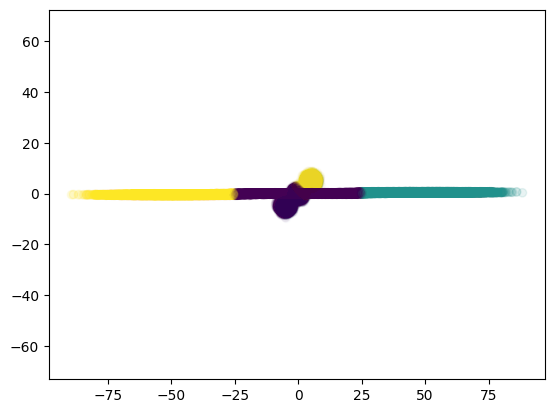

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs, make_circles

n_samples = 50000

centers = [(-5, -5), (0, 0), (5, 5)]

X, y = make_blobs(
    n_samples=n_samples,
    centers=centers,
    shuffle=True,
    random_state=42,
)

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)
X[:5, :]
plt.scatter(X[:, 0], X[:, 1], alpha=0.01)
np.around(kmeans.cluster_centers_, 2)

plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, alpha=0.05);

from sklearn.metrics import silhouette_score

silhouette_score(X, kmeans.labels_)
X[:,0] = X[:,0]*10
X[:,1] = X[:,1]/10
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, alpha=0.1)
plt.axis('equal')
plt.show()

# Descida no Gradiente

Convergência alcançada após 48 iterações.
Mínimo local encontrado: x = 2.2500037021393844, f(x) = -6.5429687498612275


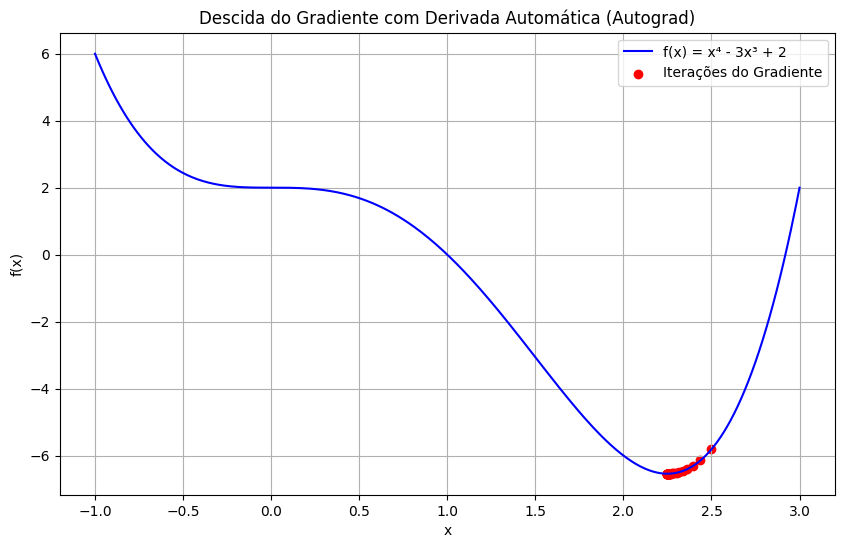

In [9]:
import autograd.numpy as anp
from autograd import grad
import matplotlib.pyplot as plt

def f(x):
    """Função objetivo: f(x) = x^4 - 3x^3 + 2"""
    return x**4 - 3*x**3 + 2

# Calcula a derivada de f(x) automaticamente
df = grad(f)

def gradient_descent(initial_x, learning_rate, num_iterations, tolerance):
    """Implementação da descida do gradiente usando Autograd para derivadas automáticas"""
    x_current = initial_x
    history = [x_current]
    
    for i in range(num_iterations):
        grad_value = df(x_current)
        x_new = x_current - learning_rate * grad_value
        history.append(x_new)
        
        # Verifica a convergência
        if abs(x_new - x_current) < tolerance:
            print(f"Convergência alcançada após {i+1} iterações.")
            break
        x_current = x_new
    return x_new, history

# Parâmetros
initial_x = 2.5       # Ponto inicial
learning_rate = 0.01  # Taxa de aprendizado
num_iterations = 1000
tolerance = 1e-6

# Executa a descida do gradiente
minimum, history = gradient_descent(initial_x, learning_rate, num_iterations, tolerance)

print(f"Mínimo local encontrado: x = {minimum}, f(x) = {f(minimum)}")

# Visualização da função f(x)
x_values = anp.linspace(-1, 3, 400)
y_values = f(x_values)

plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label="f(x) = x⁴ - 3x³ + 2", color='blue')
plt.scatter(history, [f(x) for x in history], color='red', label="Iterações do Gradiente")
plt.title('Descida do Gradiente com Derivada Automática (Autograd)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()


# Regressão Linear

Primeiras 5 linhas do dataset:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  

Informações do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 

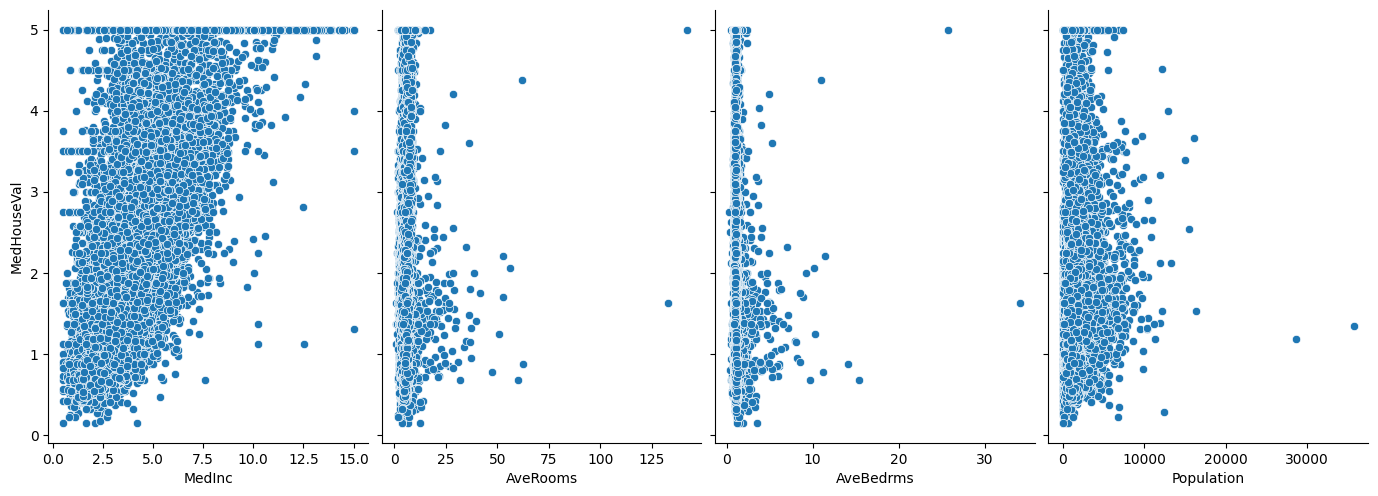


Erro Quadrático Médio (MSE): 0.5559
Raiz do Erro Quadrático Médio (RMSE): 0.7456
Coeficiente de Determinação (R²): 0.5758

Coeficientes do Modelo:
      Feature  Coeficiente
0      MedInc     0.448675
1    HouseAge     0.009724
2    AveRooms    -0.123323
3   AveBedrms     0.783145
4  Population    -0.000002
5    AveOccup    -0.003526
6    Latitude    -0.419792
7   Longitude    -0.433708


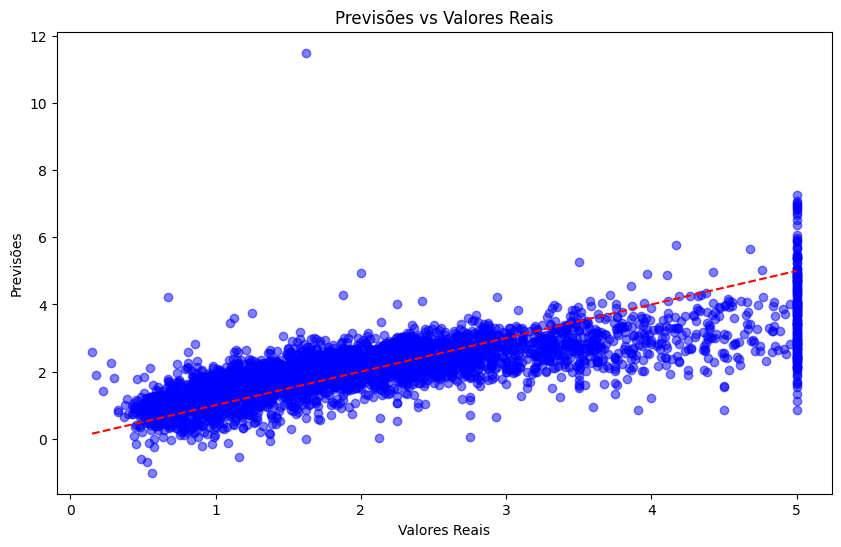

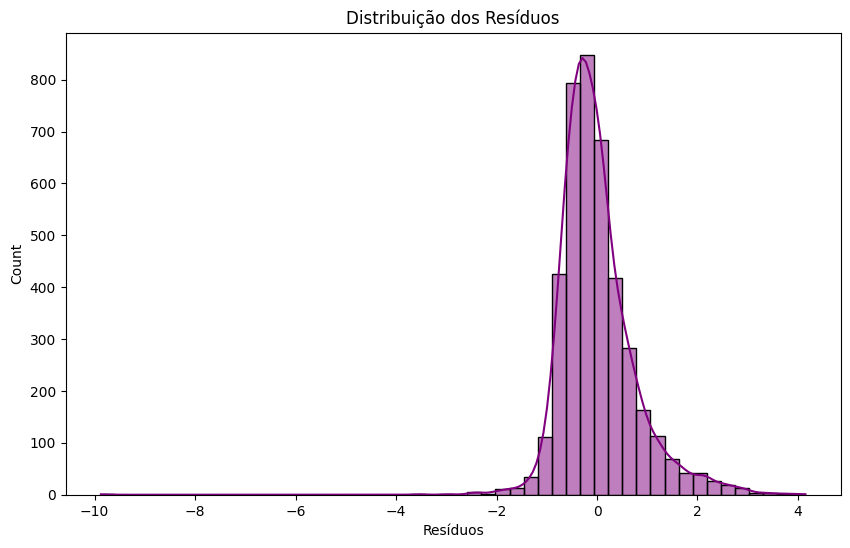

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. Carregar o Conjunto de Dados
california = fetch_california_housing()

# Converter para DataFrame para facilitar a manipulação
df = pd.DataFrame(data=california.data, columns=california.feature_names)
df['MedHouseVal'] = california.target

# 2. Explorar o Conjunto de Dados
print("Primeiras 5 linhas do dataset:")
print(df.head())

print("\nInformações do dataset:")
print(df.info())

print("\nEstatísticas Descritivas:")
print(df.describe())

# 3. Análise Exploratória de Dados (EDA)
sns.pairplot(df, x_vars=['MedInc', 'AveRooms', 'AveBedrms', 'Population'],
             y_vars='MedHouseVal', height=5, aspect=0.7, kind='scatter')
plt.show()

# 4. Selecionar Variáveis Independentes e Dependentes
X = df.drop('MedHouseVal', axis=1)  # Variáveis independentes
y = df['MedHouseVal']               # Variável dependente

# 5. Dividir os Dados em Treinamento e Teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Treinar o Modelo de Regressão Linear
model = LinearRegression()
model.fit(X_train, y_train)

# 7. Fazer Previsões
y_pred = model.predict(X_test)

# 8. Avaliar o Modelo
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"\nErro Quadrático Médio (MSE): {mse:.4f}")
print(f"Raiz do Erro Quadrático Médio (RMSE): {rmse:.4f}")
print(f"Coeficiente de Determinação (R²): {r2:.4f}")

# 9. Coeficientes do Modelo
coeficientes = pd.DataFrame({
    'Feature': X.columns,
    'Coeficiente': model.coef_ #relação entre as variáveis independentes e a variável dependente
})
print("\nCoeficientes do Modelo:")
print(coeficientes)

# 10. Visualizar as Previsões vs Valores Reais
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.5, color='b')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Linha de referência
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.title('Previsões vs Valores Reais')
plt.show()

# 11. Resíduos do Modelo
residuos = y_test - y_pred

plt.figure(figsize=(10,6))
sns.histplot(residuos, bins=50, kde=True, color='purple')
plt.xlabel('Resíduos')
plt.title('Distribuição dos Resíduos')
plt.show()


### Análise Exploratória de Dados (EDA):

Utilizamos seaborn para criar gráficos de dispersão entre algumas características e o valor médio das casas (MedHouseVal).
Isso ajuda a entender possíveis relações lineares entre variáveis.

### Selecionar Variáveis Independentes e Dependentes:

X: Todas as colunas menos MedHouseVal.
y: MedHouseVal, que é a variável que queremos prever.

### Dividir os Dados em Treinamento e Teste:

Utilizamos train_test_split para dividir os dados em 80% para treinamento e 20% para teste.
random_state=42 garante que a divisão seja reproduzível.

Usamos o modelo treinado para prever os valores de MedHouseVal no conjunto de teste.

### Avaliar o Modelo:

MSE (Erro Quadrático Médio): Mede a média dos erros quadráticos das previsões.

RMSE (Raiz do Erro Quadrático Médio): A raiz quadrada do MSE, interpretável na mesma unidade da variável alvo.

R² (Coeficiente de Determinação): Indica a proporção da variabilidade da variável dependente explicada pelo modelo. Varia entre 0 e 1, sendo valores mais próximos de 1 melhores.

### Analisar os Coeficientes do Modelo:

Mostra a contribuição de cada característica na previsão.

Coeficientes positivos indicam uma relação direta com a variável alvo, enquanto negativos indicam uma relação inversa.

Adicionalmente o professor também usa a função model.intercept_ que retorna o valor de Y quando as outras variáveis são 0.

### Visualizar as Previsões vs Valores Reais:

Gráfico de Dispersão: Compara os valores reais com as previsões do modelo.

Linha de Referência (Reta Diagonal): Representa previsões perfeitas. Quanto mais os pontos estiverem próximos dessa linha, melhor o modelo.

### Analisar os Resíduos do Modelo:

Histograma dos Resíduos: Verifica a distribuição dos erros das previsões.

Idealmente, os resíduos devem seguir uma distribuição normal centrada em zero, indicando que os erros não são sistemáticos.

# Distância cosseno

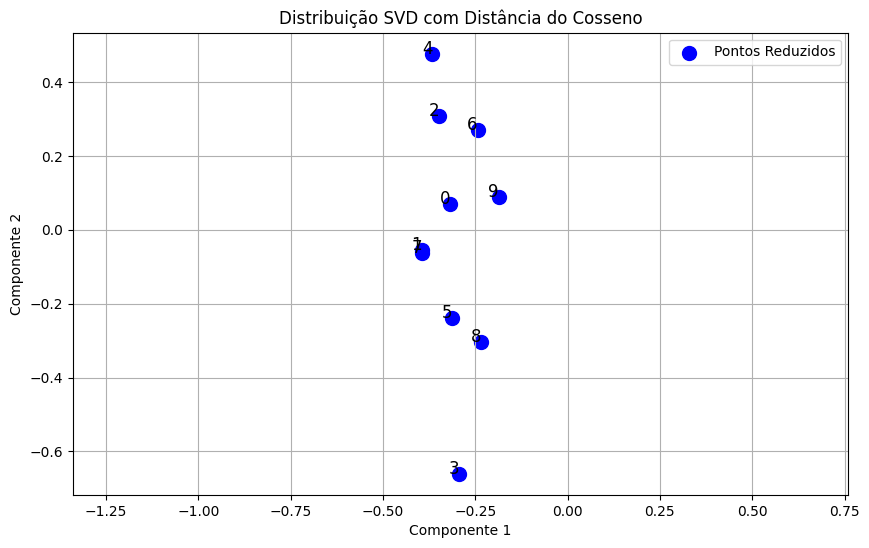

Matriz de Distâncias do Cosseno:
[[ 0.00000000e+00  6.11696562e-02  1.25974588e-01  7.98865803e-01
   2.34713362e-01  3.54617460e-01  1.86642455e-01  6.94704359e-02
   5.72380049e-01  2.51916323e-02]
 [ 6.11696562e-02  0.00000000e+00  3.46765849e-01  4.73826966e-01
   5.03199524e-01  1.31037343e-01  4.36743189e-01  2.72873929e-04
   2.87232145e-01  1.61632234e-01]
 [ 1.25974588e-01  3.46765849e-01 -2.22044605e-16  1.30015422e+00
   1.83639697e-02  8.07063486e-01  6.43715824e-03  3.64631000e-01
   1.06546490e+00  3.96200267e-02]
 [ 7.98865803e-01  4.73826966e-01  1.30015422e+00 -2.22044605e-16
   1.47660970e+00  1.21942440e-01  1.40628101e+00  4.54106021e-01
   2.85059625e-02  1.02241855e+00]
 [ 2.34713362e-01  5.03199524e-01  1.83639697e-02  1.47660970e+00
  -2.22044605e-16  9.97785834e-01  3.07279077e-03  5.23608108e-01
   1.25461697e+00  1.10421038e-01]
 [ 3.54617460e-01  1.31037343e-01  8.07063486e-01  1.21942440e-01
   9.97785834e-01 -2.22044605e-16  9.19459315e-01  1.19714289e-01


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize

# Gerando uma matriz aleatória
np.random.seed(0)
A = np.random.rand(10, 5)  # 10 amostras e 5 características

# Aplicando SVD
U, S, VT = np.linalg.svd(A)

# Reduzindo para 2 dimensões usando os primeiros 2 componentes
X_reduced = U[:, :2]

# Função para calcular a distância do cosseno
def cosine_distance(a, b):
    return 1 - np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

# Calculando a distância do cosseno entre cada par de pontos
distances = np.zeros((X_reduced.shape[0], X_reduced.shape[0]))

for i in range(X_reduced.shape[0]):
    for j in range(X_reduced.shape[0]):
        distances[i, j] = cosine_distance(X_reduced[i], X_reduced[j])

# Criando o gráfico
plt.figure(figsize=(10, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], s=100, c='blue', label='Pontos Reduzidos')
for i in range(X_reduced.shape[0]):
    plt.annotate(f'{i}', (X_reduced[i, 0], X_reduced[i, 1]), fontsize=12, ha='right')

plt.title('Distribuição SVD com Distância do Cosseno')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.grid()
plt.legend()
plt.axis('equal')
plt.show()

# Exibindo as distâncias do cosseno
print("Matriz de Distâncias do Cosseno:")
print(distances)


# Normalização

In [ ]:
df['target'] = df['target'].apply(np.log10)
df['Population'] = df['Population'].apply(np.log10)

# Equação Normal da Regressão linear

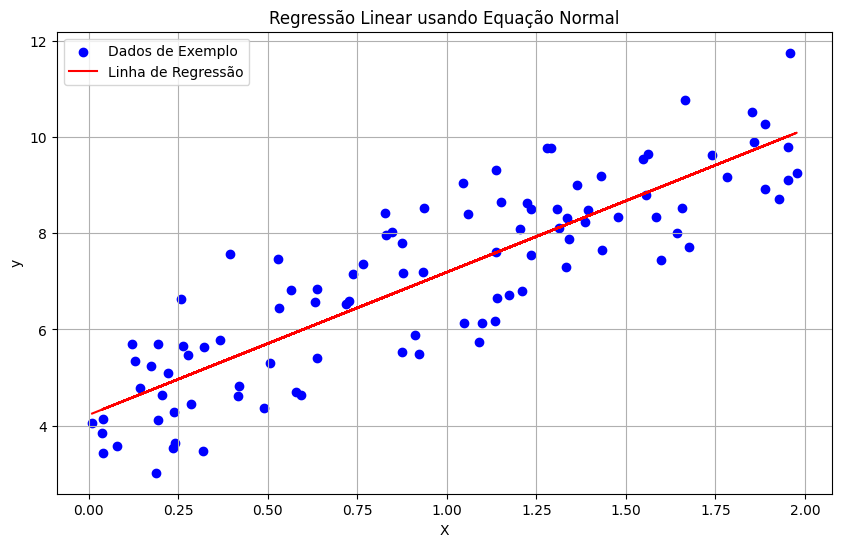

Coeficiente Angular (slope): 2.968467510701018
Intercepto (intercept): 4.22215107744723


In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Gerando dados de exemplo
np.random.seed(0)
X = 2 * np.random.rand(100, 1)  # 100 pontos de dados com uma única característica
y = 4 + 3 * X + np.random.randn(100, 1)  # Relação linear com ruído

# Adicionando uma coluna de 1s a X para o intercepto
X_b = np.c_[np.ones((X.shape[0], 1)), X]  # X com a coluna de 1s

# Calculando os coeficientes usando a equação normal
beta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

# Fazendo previsões
y_predict = X_b.dot(beta)

# Criando o gráfico
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Dados de Exemplo')  # Dados originais
plt.plot(X, y_predict, color='red', label='Linha de Regressão')  # Linha de regressão
plt.title('Regressão Linear usando Equação Normal')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

# Exibindo os coeficientes
print(f'Coeficiente Angular (slope): {beta[1][0]}')
print(f'Intercepto (intercept): {beta[0][0]}')


$ β=(X^TX)^−1X^Ty $

X é incrementado com uma coluna de 1s